In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd, numpy as np, pickle, matplotlib.pyplot as plt


In [8]:
data = pd.read_csv('data.csv')
data

,BHK,RentPrice,Bathroom,Bedroom
0,2,13500.0,1,2
1,1,15000.0,1,1
2,2,22000.0,1,2
3,2,16000.0,1,2
4,2,45000.0,1,3
...,...,...,...,...
148,1,16000.0,1,1
149,3,25000.0,2,3
150,2,16000.0,1,2
151,2,16000.0,1,2


In [9]:
data.dropna(inplace=True)
X = data.iloc[:, [0, 2]]
Y = data.iloc[:, 1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

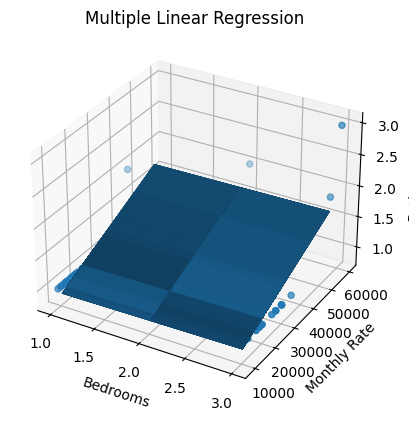

In [12]:
x = data['BHK']
y = data['RentPrice']
z = data['Bathroom']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)


A = np.vstack([x, y, np.ones_like(x)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)

# Create a meshgrid for the plane
x_plane, y_plane = np.meshgrid(x, y)
z_plane = plane_coef[0] * x_plane + plane_coef[1] * y_plane + plane_coef[2]

# Add the regression plane
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5)

# Add labels and title
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Monthly Rate')
ax.set_zlabel('Bathrooms')
plt.title('Multiple Linear Regression')

# Show the plot
plt.show()

In [13]:
pickle.dump(model, open('model.pkl', 'wb'))

In [14]:
X_test

,BHK,Bathroom
68,2,1
148,1,1
96,3,1
82,2,2
136,2,2
140,2,1
26,3,1
12,1,1
18,1,1
15,2,1


In [15]:
predictions = model.predict(X_test)



nprd = model.predict([[2,1]])
print(nprd)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

print('Coefficients:', model.coef_)

[20280.04422677]
Mean Squared Error: 30337612.10544016
Coefficients: [ 4756.57197982 13991.78658356]


/home/cabbage/Desktop/freelance/pragati_shrestha/roomrental/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
